In [1]:
cd /ihme/code/beatrixh/microsim_2020/census_2020/synthetic_pop/gen_synth_pop/

/ihme/code/beatrixh/microsim_2020/census_2020/synthetic_pop/gen_synth_pop


In [2]:
from new_process_decennial import add_geoid

In [3]:
cd /ihme/code/beatrixh/microsim_2020/census_2020/explore_census_2020_dp/explore/compare_DAS_runs

/ihme/code/beatrixh/microsim_2020/census_2020/explore_census_2020_dp/explore/compare_DAS_runs


In [4]:
from plotting_fns import *
from data_cleaning import *

# Compare effects of new DAS (jun 20) vs old DAS (oct 19)

look into known biases: downward bias among aian alone on reservations; upward bias in rural areas (specifically among asian alone; downward bias in urban areas (specifically among asian alone)

## changes in bias among AIAN alone population living on reservations

In [5]:
## this is data from vintage 20200527, the demo product for the updated DAS
## https://www.nhgis.org/privacy-protected-demonstration-data

new_aian_path = '/ihme/scratch/users/beatrixh/demonstration_products_2020/nhgis_ppdd_20200527_aianhh_144.csv'
usecols = ['name','state','H7X004_sf','H7X004_dp']

new_aian_df = pull_data_aian(new_aian_path, usecols, groupvar = 'name')

In [6]:
new_aian_df.head()

,name,state,aian_alone_dp_new,aian_alone_sf
0,Acoma Pueblo and Off-Reservation Trust Land (p...,140,2886,2906
1,Adais Caddo SDTSA (part),66,49,103
2,Agua Caliente Indian Reservation and Off-Reser...,72,218,238
3,Akhiok ANVSA,2,32,36
4,Akiachak ANVSA,2,628,596


In [7]:
## this is data from the oct 2019 release of the 2010 census with DAS, combined with the 2010 census
## https://ciser.cornell.edu/data/data-archive/census-2010-sf1-download-center/
## https://ciser.cornell.edu/data/data-archive/census-2010-dhc-download-center/

old_aian_path = '/ihme/scratch/users/beatrixh/ciser/demonstration_2010/aianhh/census_2010_aianhh_areas_aian_pop.csv'
usecols = ['AIANHH',
           'P0030004_SF',
           'P0030004_DP',
           'P0060004_SF',
           'P0060004_DP',
           'P0010001_SF',
           'P0010001_DP']

old_aian_df = pull_data_aian(old_aian_path, usecols, groupvar = 'AIANHH')

In [8]:
old_aian_df.head()

,AIANHH,all_pop_sf,aian_alone_sf,aian_in_combo_sf,aian_in_combo_dp_old,all_pop_dp_old,aian_alone_dp_old
0,10,3011,2906,2947,2979,3048,2903
1,20,24781,238,435,546,24953,190
2,50,608,552,567,311,461,310
3,80,6490,1606,1787,1727,6405,1558
4,95,0,0,0,0,0,0


In [9]:
assert(old_aian_df.aian_alone_sf.sort_values().tolist() == 
       new_aian_df.aian_alone_sf.sort_values().tolist()), "old and new csvs have different sf1 vals"

In [10]:
assert(old_aian_df.shape[0]==old_aian_df.AIANHH.nunique()), "AIANHH not a key"

In [11]:
## merge data

# sort
old_aian_df = old_aian_df.sort_values(by='aian_alone_sf').reset_index()
new_aian_df = new_aian_df.sort_values(by='aian_alone_sf').reset_index()

# create key
new_aian_df['key'] = old_aian_df.AIANHH

# merge
aian_df = old_aian_df.merge(new_aian_df, left_on = 'AIANHH', right_on = 'key', how = 'left')

In [12]:
## plot comparisons

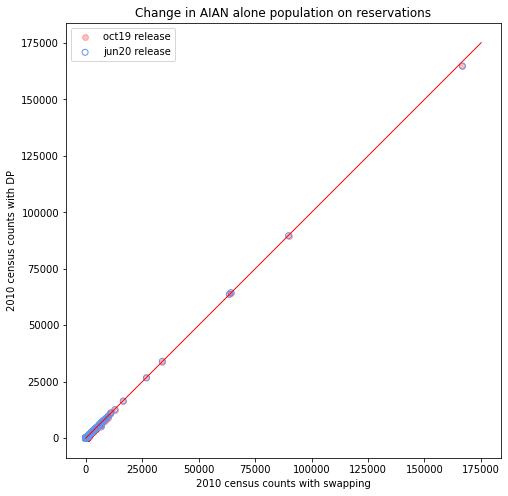

In [13]:
plot_swapping_x_old_v_new(aian_df.aian_alone_sf_x,
                          aian_df.aian_alone_dp_old,
                          aian_df.aian_alone_dp_new,
                          'oct19 release',
                          'jun20 release',
                          'Change in AIAN alone population on reservations')

plt.show()

In [32]:
## zoom in a bit

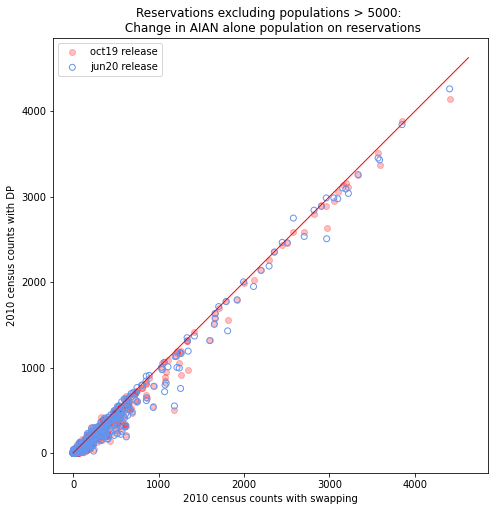

In [14]:
x = aian_df[aian_df.all_pop_sf < 5e3].aian_alone_sf_x
y_old = aian_df[aian_df.all_pop_sf < 5e3].aian_alone_dp_old
y_new = aian_df[aian_df.all_pop_sf < 5e3].aian_alone_dp_new

plot_swapping_x_old_v_new(x, y_old, y_new,
                          'oct19 release',
                          'jun20 release',
                          'Reservations excluding populations > 5000: \n Change in AIAN alone population on reservations')

plt.show()

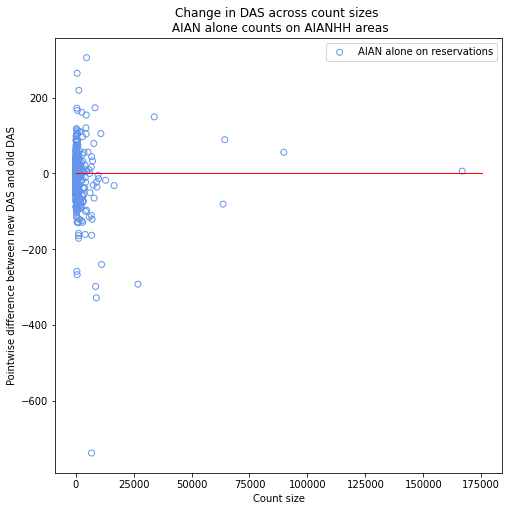

In [31]:
plot_diff_in_DAS_x_swapping(aian_df.aian_alone_sf_x,
                            aian_df.aian_alone_dp_old,
                            aian_df.aian_alone_dp_new,
                            label = 'AIAN alone on reservations',
                            title = 'Change in DAS across count sizes \n AIAN alone counts on AIANHH areas',
                            xlab = 'Count size',
                            ylab = 'Pointwise difference between new DAS and old DAS')
plt.show()

In [16]:
find_total_error(aian_df.aian_alone_dp_new,
                 aian_df.aian_alone_dp_old,
                 aian_df.aian_alone_sf_x)

,new,old
0,-38277,-33317


## changes in bias in urban vs rural asian alone population

In [17]:
## oct19 DAS release of 2010 census
ca_dp_old_path = '/ihme/scratch/users/beatrixh/ciser/demonstration_2010/ca_block2010dhc.csv'
ca_dp_old = pd.read_csv(ca_dp_old_path)
ca_dp_old.rename(columns=rename, inplace=True)

In [18]:
ca_dp_old.head()

,STATE,COUNTY,TRACT,BLKGRP,BLOCK,UR,all_pop,asian_alone_old_das
0,6,1.0,400100.0,1.0,1000.0,U,0,0
1,6,1.0,400100.0,1.0,1001.0,U,0,0
2,6,1.0,400100.0,1.0,1002.0,U,0,0
3,6,1.0,400100.0,1.0,1003.0,U,0,0
4,6,1.0,400100.0,1.0,1004.0,U,0,0


In [19]:
## jun20 DAS release of 2010 census data
ca_path_new = '/ihme/scratch/users/beatrixh/demonstration_products_2020/nhgis_ppdd_20200527_block_CA.csv'

ca_new = pd.read_csv(ca_path_new, usecols=['gisjoin','name','H7X005_sf','H7X005_dp'])
ca_new.rename(columns=rename, inplace=True)

In [20]:
ca_new.head()

,gisjoin,name,asian_alone_new_das,asian_alone_swapping
0,G06000104001001000,Block 1000,0,0
1,G06000104001001001,Block 1001,0,0
2,G06000104001001002,Block 1002,0,0
3,G06000104001001003,Block 1003,0,0
4,G06000104001001004,Block 1004,0,0


In [21]:
## merge

# create key
ca_new = add_loc_cols(ca_new)
ca_new = add_geoid(ca_new)

ca_dp_old = add_geoid(ca_dp_old)

# merge
df_ca = ca_new.merge(ca_dp_old[['geoid','UR','asian_alone_old_das']], on = 'geoid', how = 'left')

In [23]:
## split into urban and rural, aggregate to county-level
rural_ca = df_ca[df_ca.UR=='R']
rural_ca = rural_ca.groupby('COUNTY').sum()

urban_ca = df_ca[df_ca.UR=='U']
urban_ca = urban_ca.groupby('COUNTY').sum()

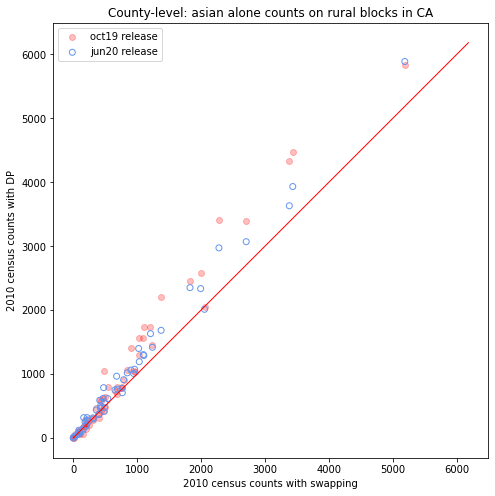

In [24]:
x = rural_ca.asian_alone_swapping
y_old = rural_ca.asian_alone_old_das
y_new = rural_ca.asian_alone_new_das

plot_swapping_x_old_v_new(x, y_old, y_new,
                          'oct19 release',
                          'jun20 release',
                          'County-level: asian alone counts on rural blocks in CA')

plt.show()

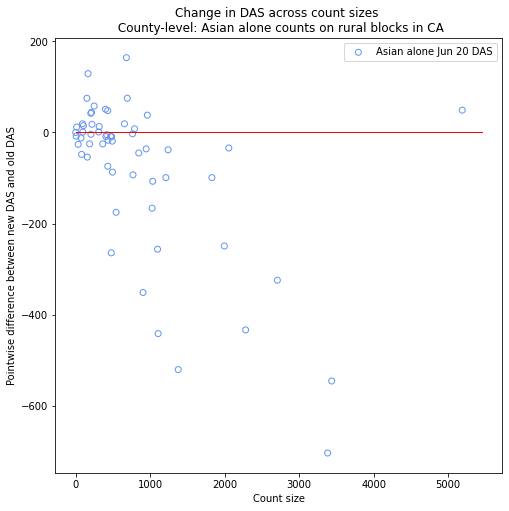

In [25]:
x = rural_ca.asian_alone_swapping
y_old = rural_ca.asian_alone_old_das
y_new = rural_ca.asian_alone_new_das

plot_diff_in_DAS_x_swapping(x,y_old, y_new,
                            label = 'Asian alone Jun 20 DAS',
                            title = 'Change in DAS across count sizes \n County-level: Asian alone counts on rural blocks in CA',
                            xlab = 'Count size',
                            ylab = 'Pointwise difference between new DAS and old DAS')
plt.show()

In [26]:
find_total_error(rural_ca.asian_alone_new_das, 
                 rural_ca.asian_alone_old_das,
                 rural_ca.asian_alone_swapping)

,new,old
0,7362,11895


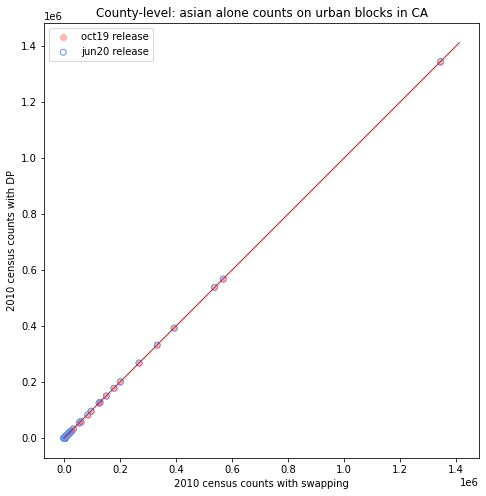

In [27]:
x = urban_ca.asian_alone_swapping
y_old = urban_ca.asian_alone_old_das
y_new = urban_ca.asian_alone_new_das

plot_swapping_x_old_v_new(x, y_old, y_new,
                          'oct19 release',
                          'jun20 release',
                          'County-level: asian alone counts on urban blocks in CA')

plt.show()

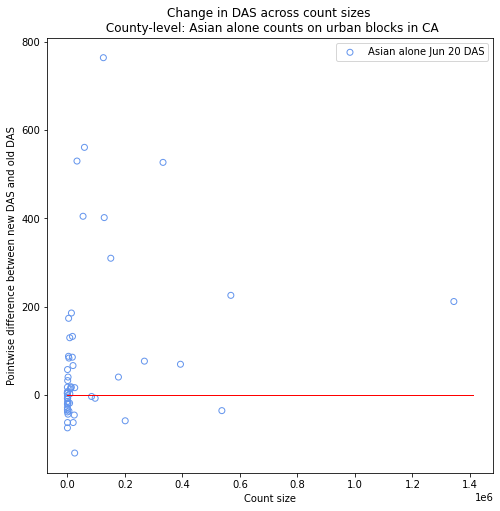

In [28]:
x = urban_ca.asian_alone_swapping
y_old = urban_ca.asian_alone_old_das
y_new = urban_ca.asian_alone_new_das

plot_diff_in_DAS_x_swapping(x,y_old, y_new,
                            label = 'Asian alone Jun 20 DAS',
                            title = 'Change in DAS across count sizes \n County-level: Asian alone counts on urban blocks in CA',
                            xlab = 'Count size',
                            ylab = 'Pointwise difference between new DAS and old DAS')
plt.show()